<a href="https://colab.research.google.com/github/DipankarJDutta/DipankarJDutta-Biomarker-discovery-from-B-T-cells-in-FASD-GDM-with-LSTM/blob/Evaluating-Model-Performance/LSTM_B_T_Median_optimized%20model_trained%20on%2044%20samples_ready%20for%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Don't display "warnings"
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [0]:
# Loading essentials
from numpy import loadtxt
from numpy import reshape
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [0]:
# Fixing random seed to 007 for reproducibility
from numpy.random import seed
seed(7)
from tensorflow import set_random_seed
set_random_seed(7)

In [28]:
# Generate 12 random integers between 1 and 56 to be used to make a new training dataset with 44 samples (No test-validation split)
import random
random.sample(range(1, 56), 12)

[15, 23, 55, 44, 53, 49, 30, 19, 2, 27, 36, 42]

In [0]:
# Load curtailed training-only dataset with 44 samples. The samples corresponding to the above random numbers were removed from the original dataset of 56 samples and compiled into a test-only dataset with 12 samples.
dataset = loadtxt('B-T-median_train-only.csv', delimiter = ',')

In [0]:
# Reshape 2D train-only dataset with 44 samples into a 3D dataset with columns as features with one time-step
x = dataset.reshape(44, 1, 30)

In [31]:
#Specify binary output of good (1) and bad (0) learners, y, in x. Learner type differentiated by population median.
y = x [:, :, -1]
print (y)

[[0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]]


In [0]:
# Define LSTM One-to-One Model with 3 LSTM cells (determined via hyperparameter optimization) with the train-only dataset of 44 samples. Sigmoid activation on the output layer for binary classification.
model = Sequential()
model.add(LSTM(3, input_shape=(1,30)))
model.add(Dense(1, activation='sigmoid'))

In [0]:
# Compile the LSTM model 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
# Fit the model with NO validation split & shuffling sample order within an epoch. Batch size updated to 8 to be an even factor of sample size of 56.
history = model.fit(x, y, validation_split = 0.0, validation_data=None, batch_size = 8, epochs = 1000, shuffle = True)

Epoch 1/1000





44/44 [==============================] - 1s 28ms/step - loss: 0.7120 - acc: 0.4318
Epoch 2/1000
44/44 [==============================] - 0s 452us/step - loss: 0.7094 - acc: 0.4318
Epoch 3/1000
44/44 [==============================] - 0s 454us/step - loss: 0.7061 - acc: 0.4318
Epoch 4/1000
44/44 [==============================] - 0s 436us/step - loss: 0.7034 - acc: 0.4318
Epoch 5/1000
44/44 [==============================] - 0s 443us/step - loss: 0.7009 - acc: 0.4318
Epoch 6/1000
44/44 [==============================] - 0s 485us/step - loss: 0.6992 - acc: 0.4318
Epoch 7/1000
44/44 [==============================] - 0s 446us/step - loss: 0.6970 - acc: 0.4318
Epoch 8/1000
44/44 [==============================] - 0s 426us/step - loss: 0.6956 - acc: 0.4318
Epoch 9/1000
44/44 [==============================] - 0s 408us/step - loss: 0.6937 - acc: 0.4318
Epoch 10/1000
44/44 [==============================] - 0s 490us/step - loss: 0.6924 - acc: 0.4318
Epoch 11/1000
44/44 [====

In [35]:
# Print Model Summary
summary = model.summary()
print(summary)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 3)                 408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 412
Trainable params: 412
Non-trainable params: 0
_________________________________________________________________
None


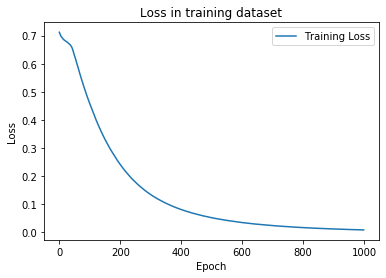

In [36]:
#Diagnostic plot Ia: Model Performance (training loss) for 1000 epochs
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.title('Loss in training dataset')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.legend(['Training Loss'], loc='upper right')
pyplot.show()

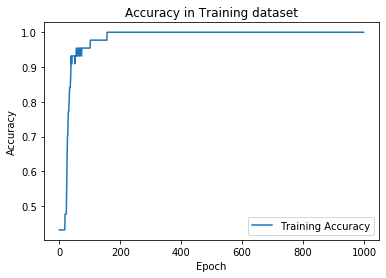

In [37]:
#Diagnostic Plot IIa: Model Performance (training accuracy) for 1000 epochs
pyplot.plot(history.history['acc'])
pyplot.title('Accuracy in Training dataset')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epoch')
pyplot.legend(['Training Accuracy'], loc='lower right')
pyplot.show()

In [38]:
#Installing h5py Python library to save trained models
!pip install h5py

In [0]:
#Save trained keras LSTM Model (trained on 44 train-only samples)
model.save('B-T-median_LSTM_train-only.h5')